# Single variable

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df = pd.read_csv("homePrices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


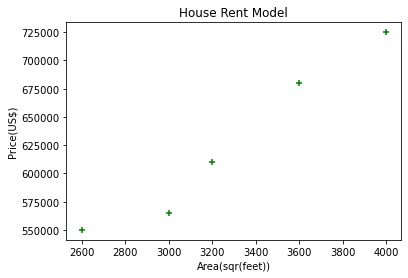

In [6]:
%matplotlib inline
plt.xlabel("Area(sqr(feet))")
plt.ylabel("Price(US$)")
plt.title("House Rent Model")
plt.scatter(df.area, df.price, color = "green", marker = "+")

In [9]:
# Now its ready to be predicted as linear data
reg= linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [60]:
# Now use lreg function to predict values
print(reg.coef_)
print(reg.intercept_)

# By formula Y = mx + c
# value of m = 135.78767123
# value of c(intercept) =180616.43835616432

[135.78767123]
180616.43835616432


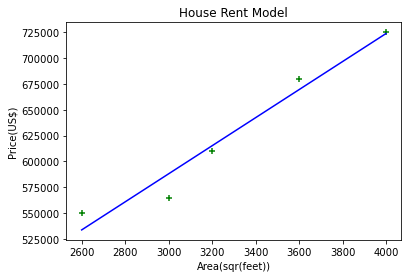

In [68]:
# How would Linear regressin line would look
%matplotlib inline
plt.xlabel("Area(sqr(feet))")
plt.ylabel("Price(US$)")
plt.title("House Rent Model")
plt.scatter(df.area, df.price, color = "green", marker = "+")
plt.plot(df.area, reg.predict(df[["area"]]), color = "blue")

In [29]:
# Y = mx + c
135.78767123 * 2100 +180616.43835616432

# Here is the price for 2100 sqrfeet area
465770.54793916433

465770.54793916433

In [10]:
print(reg.predict([[2700]]))

[547243.15068493]


In [39]:
# Predicting data based on given list of area values
df_area = pd.read_csv("area.csv")
df_area.head(5)

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [38]:
reg.predict(df_area)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [47]:
# storing these predictions into some file
price_predictions = reg.predict(df_area)

# Now creating another column in area.csv by name of prices
df_area['prices'] = price_predictions


In [43]:
df_area

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [72]:
# Exporting these values to csv file
df_area.to_csv("Predicted_Prices.csv",index = False)

In [80]:
dfc = pd.read_csv("canada_per_capita_income.csv")
dfc.head(10)

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


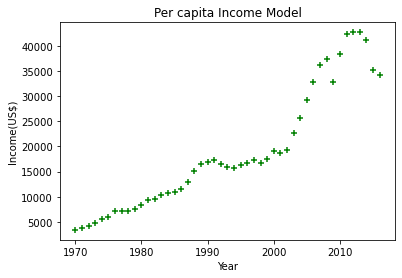

In [74]:
%matplotlib inline
plt.xlabel("Year")
plt.ylabel("Income(US$)")
plt.title("Per capita Income Model")
plt.scatter(dfc.year, dfc.income, color = "green", marker = "+")

In [77]:
reg= linear_model.LinearRegression()
reg.fit(dfc[['year']], dfc.income)

LinearRegression()

In [81]:
# print(reg.predict(1998))
print(reg.coef_)
print(reg.intercept_)
828.46507522 * 1977 + -1632210.7578554575

[828.46507522]
-1632210.7578554575


5664.695854482474

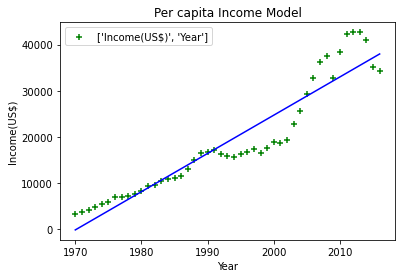

In [91]:
# How would Linear regressin line would look
%matplotlib inline
plt.xlabel("Year")
plt.ylabel("Income(US$)")
plt.title("Per capita Income Model")
plt.scatter(dfc.year, dfc.income, color = "green", marker = "+", label = ["Income(US$)", "Year"])
plt.plot(dfc.year, reg.predict(dfc[["year"]]), color = "blue",  )
plt.legend()

In [12]:
dfy = pd.read_csv("est_year.csv")
dfy.head(5)

,year
0,1983
1,1984
2,1985
3,1986
4,1987


In [87]:
reg.predict(dfy)

array([10635.48631118, 11463.9513864 , 12292.41646162, 13120.88153685,
       13949.34661207, 14777.81168729, 15606.27676251, 16434.74183774,
       17263.20691296, 18091.67198818, 18920.1370634 , 19748.60213863,
       20577.06721385, 21405.53228907, 22233.9973643 , 23062.46243952,
       23890.92751474, 24719.39258996, 25547.85766519, 26376.32274041,
       27204.78781563, 28033.25289085, 28861.71796608, 29690.1830413 ,
       30518.64811652, 31347.11319175, 32175.57826697, 33004.04334219,
       33832.50841741, 34660.97349264, 35489.43856786, 36317.90364308,
       37146.3687183 , 37974.83379353])

In [13]:
income_data = reg.predict(dfy)
dfy["est_income"] = income_data


In [89]:
dfy.to_csv("Income_percapita_model.csv", index = False)

## Multivariant Linear Regression

In [3]:
df = pd.read_csv("home_with_bed.csv")
df


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [17]:
# Handling missing data with median values
import math
df.bedrooms.median()

bed_medium = math.floor(df.bedrooms.median())
bed_medium

df.bedrooms.fillna(bed_medium, inplace = True)



In [15]:
df.bedrooms = df.bedrooms.fillna(bed_medium)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [24]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

In [25]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [26]:
reg.intercept_

221323.00186540408

In [29]:
# making predictions

reg.predict([[3000, 3, 40]])
# Due to higher age price got down to 498408.2515 but from table 3000 area price is = 565000

array([498408.25158031])

In [30]:
# checking the price of new house
reg.predict([[2700, 4, 5]])


array([601288.52587776])

### Excercise Hiring of multivariate

In [71]:
dfh = pd.read_csv("hiring.csv")
dfh


,experience,test_score,interview_score,salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


8

,experience,test_score,interview_score,salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [76]:
import word2number
from word2number import w2n

dfh.experience= dfh.experience.fillna("zero")
dfh

,experience,test_score,interview_score,salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [77]:
dfh.experience = dfh.experience.apply(w2n.word_to_num)
dfh

,experience,test_score,interview_score,salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [78]:
test_score_median = math.floor(dfh.test_score.median())
test_score_median

8

In [81]:
dfh.test_score.fillna(test_score_median, inplace = True)
dfh

,experience,test_score,interview_score,salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [84]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(dfh[['experience', 'test_score', 'interview_score']], dfh['salary($)'])

LinearRegression()

In [85]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [86]:
reg.intercept_

17737.26346433771

In [88]:
reg.predict([[1, 6.0, 4]])

array([40445.41484716])

In [89]:
reg.predict([[2, 9.0, 6.0]])

array([53205.96797671])

In [90]:
reg.predict([[12, 10.0, 10.0]])

array([92002.18340611])